# Script de procesamiento
---

## Características del dataset

* Conjuntos de datos de análisis de barreras de accesibilidad de las páginas web de las instituciones universitarias (universidades e institutos universitarios) de la República Argentina en 2025
* Número de instancias: 141
* Número de variables: 12 numericas, predictoras y la clase indica si la página presenta o no problemas de accesibilidad web

## Información de variables

| Variables               | Tipo       | Descripción                                                      |
| --                      | --         | --                                                               |
| **nombre**              | categórica | Nombre de la institución universitaria                           |
| **url**                 | categórica | Dirección de la página web de la institución                     |
| **doc_language_ok**     | numérica   | Cantidad de declaración del idioma del documento                 |
| **alt_texts_ok**        | numérica   | Cantidad de imágenes con texto alternativo                       |
| **input_labels_ok**     | numérica   | Cantidad de entradas de formulario con etiqueta                  |
| **empty_buttons_ok**    | numérica   | Cantidad de botones no vacíos                                    |
| **empty_links_ok**      | numérica   | Cantidad de enlaces no vacíos                                    |
| **color_contrast_ok**   | numérica   | Cantidad de texto con contraste medio o alto                     |
| **doc_language_fail**   | numérica   | Cantidad de idioma del documento faltante                        |
| **alt_texts_fail**      | numérica   | Cantidad de imágenes sin texto alternativo                       |
| **input_labels_fail**   | numérica   | Cantidad de entradas de formulario sin etiqueta                  |
| **empty_buttons_fail**  | numérica   | Cantidad de botones vacíos                                       |
| **empty_links_fail**    | numérica   | Cantidad de enlaces vacíos                                       |
| **color_contrast_fail** | numérica   | Cantidad de texto con bajo contraste                             |
| **ratio**               | numérica   | Nivel de accesibilidad real alcanzado en la prueba (éxito/total) |
| **clase**               | categórica | "sin_prob_aw" si ratio alcanza el valor mínimo deseado (0.75)    |

## Clase

* **sin_prob_aw**
* **con_prob_aw**

## Objetivo

Desarrollar un modelo de aprendizaje automático que clasifique páginas web según problemas de accesibilidad, para promover la inclusión digital y detectar  barreras que afectan a personas con discapacidad.

## Importación de librerias

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

## Carga de datos

In [35]:
df = pd.read_csv('universidades-taw.csv', sep=';')

## Exploración de datos

In [49]:
# estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nombre               141 non-null    object 
 1   url                  141 non-null    object 
 2   doc_language_ok      141 non-null    int64  
 3   alt_texts_ok         141 non-null    int64  
 4   input_labels_ok      141 non-null    int64  
 5   empty_buttons_ok     141 non-null    int64  
 6   empty_links_ok       141 non-null    int64  
 7   color_contrast_ok    141 non-null    int64  
 8   doc_language_fail    141 non-null    int64  
 9   alt_texts_fail       141 non-null    int64  
 10  input_labels_fail    141 non-null    int64  
 11  empty_buttons_fail   141 non-null    int64  
 12  empty_links_fail     141 non-null    int64  
 13  color_contrast_fail  141 non-null    int64  
 14  ratio                141 non-null    float64
 15  clase                141 non-null    obj

* Se observa que no hay observaciones faltantes (nulas)
* Todas las variables tienen el mismo número de observaciones que son 141

In [50]:
# visualizar primeras filas de observaciones
df.head()

,nombre,url,doc_language_ok,alt_texts_ok,input_labels_ok,empty_buttons_ok,empty_links_ok,color_contrast_ok,doc_language_fail,alt_texts_fail,input_labels_fail,empty_buttons_fail,empty_links_fail,color_contrast_fail,ratio,clase
0,Instituto Universitario de Gendarmería Nacional,https://iugna.edu.ar,1,6,0,7,15,41,0,5,0,0,3,8,0.813953,sin_prob_aw
1,Instituto Universitario de la Policía Federal ...,https://www.iupfa.edu.ar,0,17,0,0,93,17,1,11,0,0,11,73,0.569507,con_prob_aw
2,Instituto Universitario de Seguridad Marítima,https://iusm.edu.ar,1,4,0,1,26,47,0,3,0,0,1,4,0.908046,sin_prob_aw
3,Universidad Autónoma de Entre Ríos,https://www.uader.edu.ar/,1,3,1,13,115,125,0,54,0,3,30,68,0.624697,con_prob_aw
4,Universidad de Buenos Aires,https://www.uba.ar/,1,3,1,4,140,136,0,4,0,1,8,27,0.876923,sin_prob_aw


La salida muestra cinco observaciones con una columna para cada característica que usaremos para predecir la malignidad.

In [51]:
df.describe()

,doc_language_ok,alt_texts_ok,input_labels_ok,empty_buttons_ok,empty_links_ok,color_contrast_ok,doc_language_fail,alt_texts_fail,input_labels_fail,empty_buttons_fail,empty_links_fail,color_contrast_fail,ratio
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.943262,16.517730,1.574468,3.737589,168.468085,182.368794,0.056738,14.574468,1.609929,1.361702,9.170213,53.588652,0.809147
std,0.232165,20.674899,7.500699,4.745894,124.698525,172.230842,0.232165,17.707639,2.782016,3.019642,9.839394,82.355941,0.150131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,0.000000,0.000000,94.000000,79.000000,0.000000,2.000000,0.000000,0.000000,2.000000,10.000000,0.744986
50%,1.000000,9.000000,0.000000,2.000000,148.000000,143.000000,0.000000,9.000000,1.000000,0.000000,6.000000,28.000000,0.849057
75%,1.000000,22.000000,1.000000,6.000000,213.000000,227.000000,0.000000,20.000000,2.000000,1.000000,13.000000,55.000000,0.908795
max,1.000000,134.000000,87.000000,27.000000,779.000000,1029.000000,1.000000,125.000000,15.000000,20.000000,45.000000,542.000000,1.000000


A continuación, se muestra la cantidad de páginas con y sin problemas de accesibilidad web presentes en el dataset para saber si los datos están o no balanceados:

In [52]:
df['clase'].value_counts()

clase
sin_prob_aw    103
con_prob_aw     38
Name: count, dtype: int64

Entonces, hay 103 páginas que no presentan barreras de accesibilidad web, denotados como "sin_prob_aw", y 38 páginas que presentan barreras de accesibilidad web, denotados como "con_prob_aw". Por lo tanto, se tiene un problema de clasificación binaria

## Preparación de los datos

In [53]:
# separar variables explicativas y variable objetivo
# se eliminan las variables nombre, url, ratio, clase ya que no aportan nada al análisis estadístico
X = df.drop(columns=['nombre', 'url', 'ratio', 'clase'])
y = df['clase']

In [54]:
# dataset con variables explicativas
X

,doc_language_ok,alt_texts_ok,input_labels_ok,empty_buttons_ok,empty_links_ok,color_contrast_ok,doc_language_fail,alt_texts_fail,input_labels_fail,empty_buttons_fail,empty_links_fail,color_contrast_fail
0,1,6,0,7,15,41,0,5,0,0,3,8
1,0,17,0,0,93,17,1,11,0,0,11,73
2,1,4,0,1,26,47,0,3,0,0,1,4
3,1,3,1,13,115,125,0,54,0,3,30,68
4,1,3,1,4,140,136,0,4,0,1,8,27
...,...,...,...,...,...,...,...,...,...,...,...,...
136,1,4,6,2,78,84,0,7,2,0,8,85
137,1,19,1,0,42,71,0,5,0,0,19,55
138,1,0,0,0,0,0,0,0,0,0,0,0
139,0,1,0,1,164,202,1,25,1,0,14,29


In [55]:
# dataset con variable objetivo
y

0      sin_prob_aw
1      con_prob_aw
2      sin_prob_aw
3      con_prob_aw
4      sin_prob_aw
          ...     
136    con_prob_aw
137    con_prob_aw
138    sin_prob_aw
139    sin_prob_aw
140    con_prob_aw
Name: clase, Length: 141, dtype: object

In [56]:
# dividir en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [57]:
# Cantidad de muestras para entrenamiento
X_train.shape[0]

98

In [58]:
# Cantidad de muestras para prueba
X_test.shape[0]

43

In [59]:
# Distribución de categorías dataset original, normalize=True da proporciones
y.value_counts(normalize=True)

clase
sin_prob_aw    0.730496
con_prob_aw    0.269504
Name: proportion, dtype: float64

In [60]:
# Distribución de categorías dataset entrenamiento
y_train.value_counts(normalize=True)

clase
sin_prob_aw    0.734694
con_prob_aw    0.265306
Name: proportion, dtype: float64

In [61]:
# Distribución de categorías dataset prueba
y_test.value_counts(normalize=True)

clase
sin_prob_aw    0.72093
con_prob_aw    0.27907
Name: proportion, dtype: float64

## Inicialización de modelos

In [62]:
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

## Evaluación del rendimiento de cada modelo

In [82]:
roc_auc, accuracy, precision, recall, f1 = {}, {}, {}, {}, {}
predictions = {}

for key in models.keys():
    
    # Entrenar el modelo
    models[key].fit(X_train, y_train)
    
    # Hacer predicciones
    predictions[key] = models[key].predict(X_test)
    
    # Calcular métricas

    if key == 'Decision Trees':
        # Obtener probabilidades de la clase positiva
        y_proba = models[key].predict_proba(X_test)[:, 1]
        roc_auc[key] = roc_auc_score(y_proba, y_test.map({"sin_prob_aw":0, "con_prob_aw":1}))
    else:
        roc_auc[key] = None
    
    # Accuracy (exactitud): proporción de aciertos totales
    accuracy[key] = accuracy_score(predictions[key], y_test)

    # weighted: promedio ponderado según el soporte (cantidad de ejemplos por clase)
    # Precision: de las predicciones positivas, cuántas fueron correctas
    precision[key] = precision_score(predictions[key], y_test, average='weighted')

    # Recall: de los casos positivos reales, cuántos detectó el modelo
    recall[key] = recall_score(predictions[key], y_test, average='weighted')

    # F1-score: balance entre precision y recall
    f1[key] = f1_score(predictions[key], y_test, average='weighted')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
df_model = pd.DataFrame(index=models.keys(), columns=['ROC AUC', 'Accuracy', 'Precision', 'Recall'])
df_model['ROC AUC'] = roc_auc.values()
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = f1.values()
df_model

,ROC AUC,Accuracy,Precision,Recall,F1
Logistic Regression,NaN,0.976744,0.978682,0.976744,0.977065
Support Vector Machines,NaN,0.930233,0.933358,0.930233,0.931196
Decision Trees,0.336207,0.720930,0.712053,0.720930,0.714848
Random Forest,NaN,0.767442,0.784696,0.767442,0.774379
Naive Bayes,NaN,0.744186,0.738997,0.744186,0.741167
K-Nearest Neighbor,NaN,0.790698,0.851025,0.790698,0.810428


/var/folders/0n/g5l4v8c52nn4wxk7hl89vk3m0000gn/T/ipykernel_15132/2726708816.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


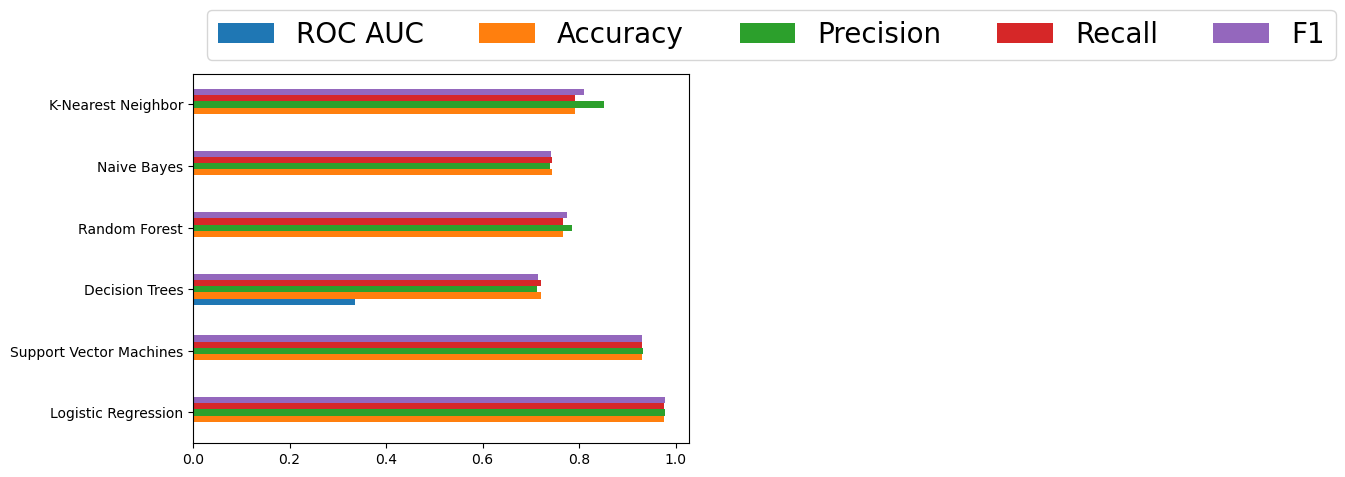

In [90]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 20}
)
plt.tight_layout()

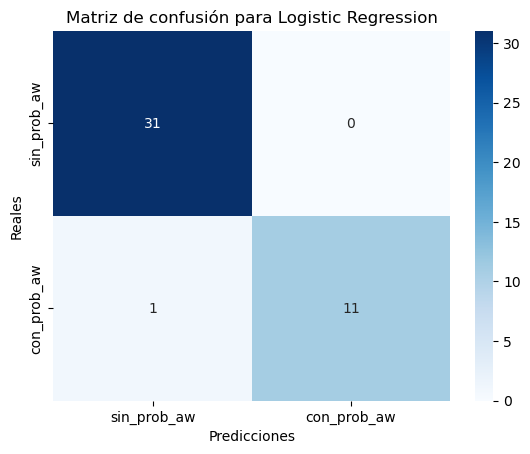

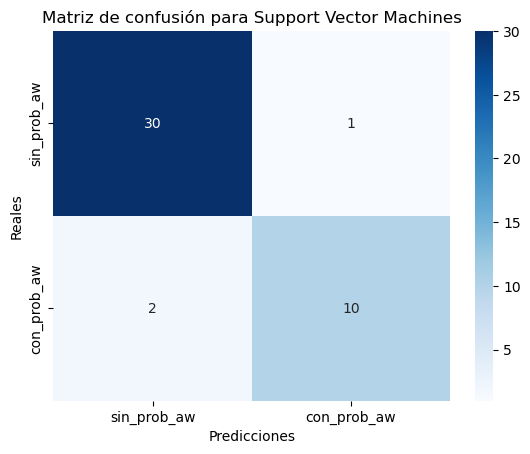

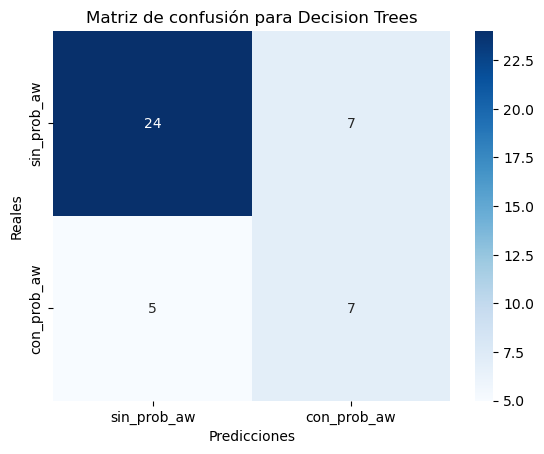

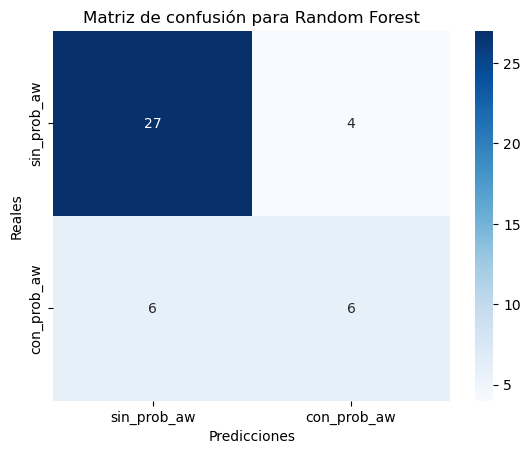

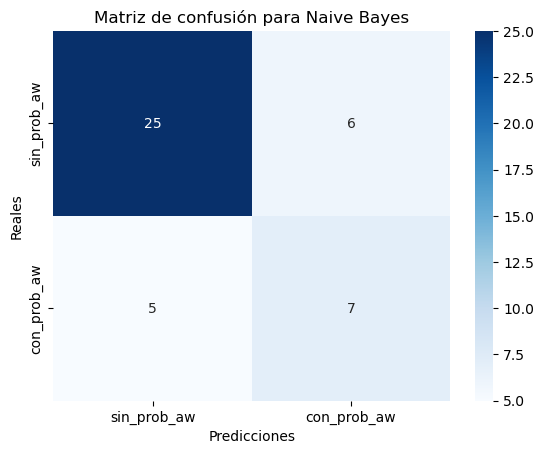

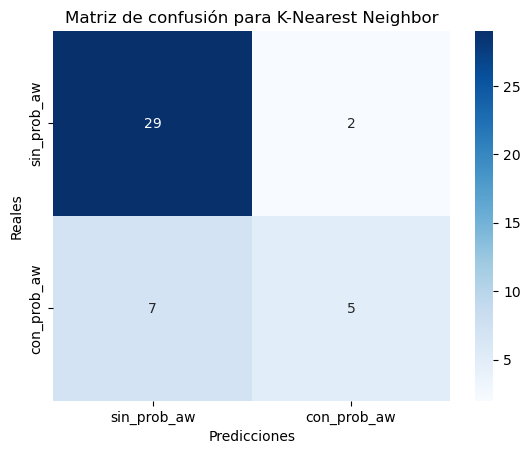

In [84]:
for key in models.keys():
    
    cm = confusion_matrix(y_test, predictions[key], labels=["sin_prob_aw", "con_prob_aw"])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["sin_prob_aw", "con_prob_aw"],
                yticklabels=["sin_prob_aw", "con_prob_aw"])
    plt.xlabel("Predicciones")
    plt.ylabel("Reales")
    plt.title("Matriz de confusión para " + key)
    plt.show()

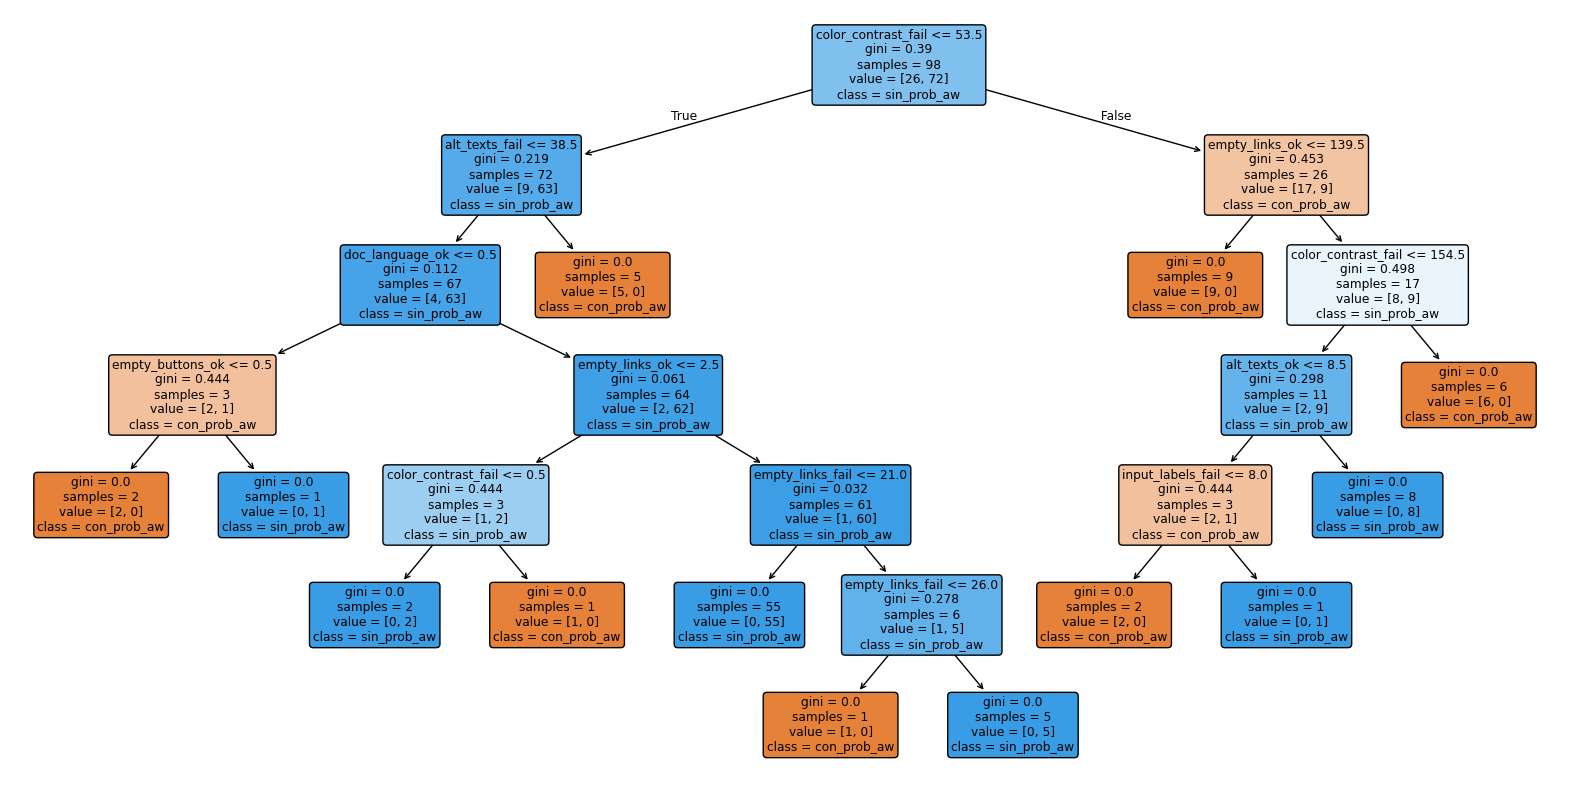

In [74]:
# Graficar el árbol
plt.figure(figsize=(20,10))                              # Ajusta el tamaño según la complejidad
plot_tree(models['Decision Trees'], 
          feature_names=X_train.columns,                 # Nombres de las variables
          class_names=[str(c) for c in arbol.classes_],  # Nombres de las clases
          filled=True,  # Colores según clase
          rounded=True) # Bordes redondeados
plt.show()